## Magnus regression

In [45]:
import numpy as np

from ball_prediction.utils.data_management import load_ball_data, load_robot_ball_data
from ball_prediction.models.magnus_regressor import (
    MagnusRegressor,
    compute_magnus_force,
)

PHYSICS_CFG = {
    "ball_mass": 0.027,
    "ball_radius": 0.02,
    "air_density": 1.18,
    "gravitational_constant": 9.80801,
    "drag_coefficient": 0.47016899,
    "lift_coefficient": 1.46968343,
    "decay_coefficient": 0.005054473513775579,
}

REGRESS_CFG = {
    "polynomial_degree": 2,
}

np.set_printoptions(suppress=True)

### Load data

In [46]:
file_path = "/home/lis/workspace/spin_project/workspace/src/ball_prediction/examples/data/mn5008_topspin.hdf5"
collection = load_ball_data(file_path)

index = str(9)
start = 0
end = 40

ball_time_stamps = collection[index]["ball_time_stamps"]
ball_positions = collection[index]["ball_positions"]
ball_velocities = collection[index]["ball_velocities"]

time_stamps = np.array(ball_time_stamps)
positions = np.array(ball_positions)
velocities = np.array(ball_velocities)

time_stamps_sec = time_stamps[start:end]
positions_sec = positions[start:end]
velocities_sec = velocities[start:end]

omega_sec = [0.0, 40.0, 0.0]

### Magnus force calculation based on ground truth

In [47]:
magnus_force_ground_truth = compute_magnus_force(velocities_sec, omega_sec, PHYSICS_CFG)

### Magnus force calculation based on regression

In [48]:
regressor = MagnusRegressor(REGRESS_CFG, PHYSICS_CFG)

magnus_force_regressed = []

for t in time_stamps_sec:
    magnus_force_regressed_t = regressor.compute(
        time_stamps=time_stamps_sec, positions=positions_sec, eval_time=t
    )
    magnus_force_regressed.append(magnus_force_regressed_t)

magnus_force_regressed = np.array(magnus_force_regressed)

### Visualisation

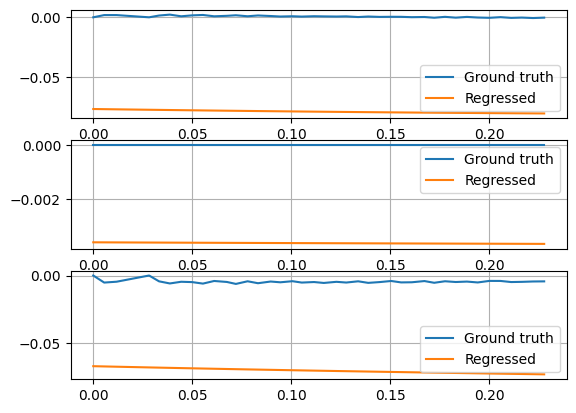

In [49]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3)

for i in range(3):
    axs[i].plot(time_stamps_sec, magnus_force_ground_truth[:, i], label="Ground truth")
    axs[i].plot(time_stamps_sec, magnus_force_regressed[:, i], label="Regressed")

    axs[i].legend()
    axs[i].grid()